# Full packet capture

## /Me

> https://github.com/markuskont/Talsec-meetup

In [24]:
stuff = [
    "IDS",
    "PCAP",
    "coding",
    "teaching",
    "hunting",
    "devops",
    "logging",
    "/^.*data.*$/"
]
speciality = "spec==[{}]".format(",".join(stuff[:-1]))
speciality = " || ".join([speciality, "spec=={}".format(stuff[-1])])
print(speciality)

spec==[IDS,PCAP,coding,teaching,hunting,devops,logging] || spec==/^.*data.*$/


## /Owl
> Moloch is a large scale, open source, indexed packet capture and search system.

* https://molo.ch/
* https://github.com/aol/moloch
* https://github.com/ccdcoe/CDMCS/tree/master/Moloch

## Architecture
### Simple

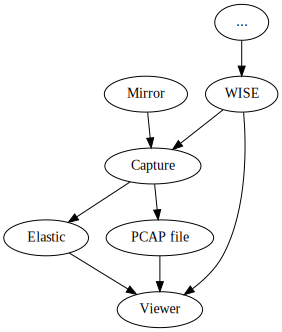

In [20]:
from graphviz import Digraph, Source
dot = Digraph(comment='moloch-general')

dot.attr(compound='true')
dot.format = 'png'
dot.landscape = True

dot.node("m", "Mirror")
dot.node("c", "Capture")
dot.node("v", "Viewer")
dot.node("w", "WISE")
dot.node("e", "Elastic")
dot.node("f", "PCAP file")
dot.node("z", "...")

dot.edge("m", "c")
dot.edge("c", "f")
dot.edge("c", "e")

dot.edge("e", "v")
dot.edge("f", "v")

dot.edge("z", "w")
dot.edge("w", "c")
dot.edge("w", "v")

Source(dot)

### General

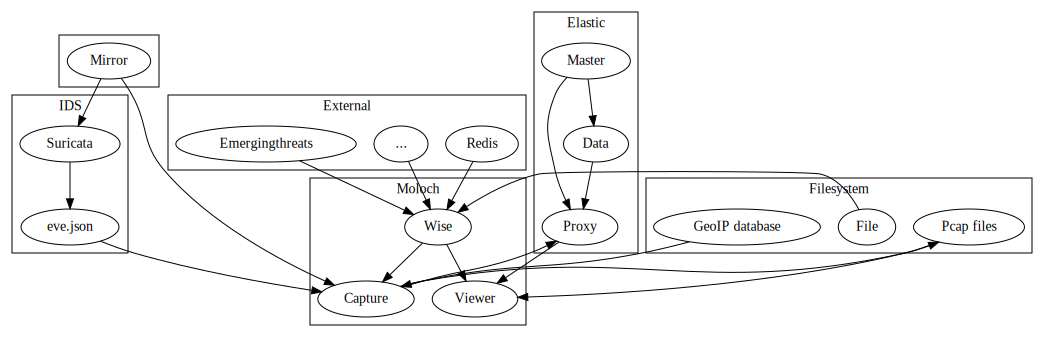

In [21]:
from graphviz import Digraph, Source
dot = Digraph(comment='moloch-general')

dot.attr(compound='true')
dot.format = 'png'
dot.landscape = True

with dot.subgraph(name="cluster_network") as net:
    net.node("m", "Mirror")

with dot.subgraph(name="cluster_moloch") as molo:
    molo.attr(label="Moloch")
    molo.node("c", "Capture")
    molo.node("v", "Viewer")
    molo.node("w", "Wise")
    
with dot.subgraph(name="cluster_elastic") as elastic:
    elastic.attr(label="Elastic")
    elastic.node("ep", "Proxy")
    elastic.node("em", "Master")
    elastic.node("ed", "Data")
    elastic.edge("ed", "ep")
    elastic.edge("em", "ep")
    elastic.edge("em", "ed")
    
with dot.subgraph(name="cluster_filesystem") as fs:
    fs.attr(label="Filesystem")
    fs.node("d", "Pcap files")
    fs.node("g", "GeoIP database")
    fs.node("f", "File")
    
with dot.subgraph(name="cluster_datasource") as ds:
    ds.attr(label="External")
    ds.node("et", "Emergingthreats")
    ds.node("r", "Redis")
    ds.node("z", "...")
    
with dot.subgraph(name="cluster_IDS") as suri:
    suri.attr(label="IDS")
    suri.node("s", "Suricata")
    suri.node("j", "eve.json")
    suri.edge("s", "j")
    
dot.edge("g", "c")
dot.edge("c", "d")
dot.edge("c", "ep")

dot.edge("ep", "v")
dot.edge("d", "v")

dot.edge("w", "c")
dot.edge("w", "v")

dot.edge("r", "w")
dot.edge("f", "w")
dot.edge("et", "w")
dot.edge("z", "w")

dot.edge("j", "c")

dot.edge("m", "c")
dot.edge("m", "s")

Source(dot)

### Mine (2019)

* https://gist.github.com/markuskont/734a9ec946bf40801494f14b368a0668
* https://github.com/ccdcoe/frankenstack/blob/master/states/yellow/data/elastic.sls
* https://github.com/ccdcoe/frankenstack/blob/master/pillar/worker.sls
* https://github.com/markuskont/moloch/blob/custom/wisePlugins/wiseService/source.ls19.js

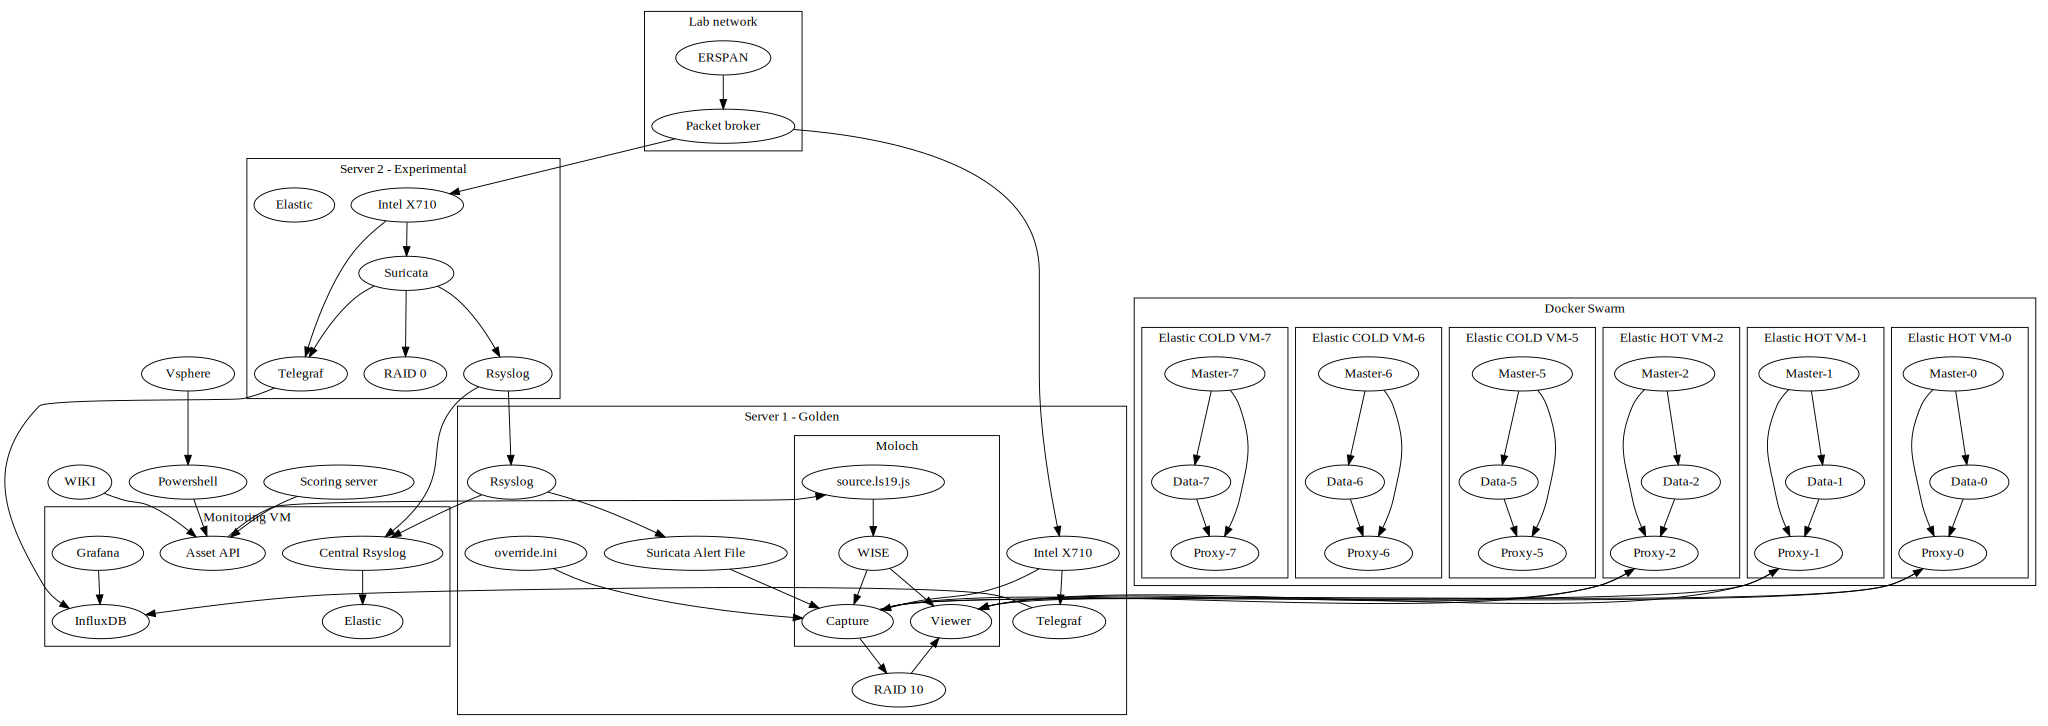

In [22]:
from graphviz import Digraph, Source
dot = Digraph(comment='moloch-general')

dot.attr(compound='true')
dot.attr(ratio="compress")
dot.format = 'png'
dot.landscape = False

with dot.subgraph(name="cluster_net") as net:
    net.attr(label="Lab network")
    net.node("erspan", "ERSPAN")
    net.node("gigamon", "Packet broker")
    net.edge("erspan", "gigamon")
    
with dot.subgraph(name="cluster_server1") as s:
    s.attr(label="Server 1 - Golden")
    s.node("s1cap", "Intel X710")
    s.node("disk", "RAID 10")
    s.node("oride", "override.ini")
    s.node("syslog", "Rsyslog")
    s.node("af", "Suricata Alert File")
    s.edge("syslog", "af")
    s.node("tgrf1", "Telegraf")
    s.edge("s1cap", "tgrf1")
    
    with s.subgraph(name="cluster_Moloch") as molo:
        molo.attr(label="Moloch")
        molo.node("c", "Capture")
        molo.node("v", "Viewer")
        molo.node("w", "WISE")
        molo.node("sls19", "source.ls19.js")
        s.edge("c", "disk")
        s.edge("disk", "v")
        s.edge("oride", "c")
        s.edge("af", "c")
        molo.edge("w", "c")
        molo.edge("w", "v")
        molo.edge("sls19", "w")
        s.edge("s1cap", "c")
        
    
with dot.subgraph(name="cluster_server2") as s:
    s.attr(label="Server 2 - Experimental")
    s.node("s2cap", "Intel X710")
    s.node("meer", "Suricata")
    s.edge("s2cap", "meer")
    s.node("disk2", "RAID 0")
    s.edge("meer", "disk2")
    s.node("syslog2", "Rsyslog")
    s.edge("meer", "syslog2")
    s.node("elastic2", "Elastic")
    s.node("tgrf2", "Telegraf")
    s.edge("s2cap", "tgrf2")
    s.edge("meer", "tgrf2")

with dot.subgraph(name="cluster_mon_vm") as mon:
    mon.attr(label="Monitoring VM")
    mon.node("go", "Asset API")
    mon.node("syslogC", "Central Rsyslog")
    mon.node("flux", "InfluxDB")
    mon.node("grfna", "Grafana")
    mon.node("elasticC", "Elastic")

    mon.edge("grfna", "flux")
    mon.edge("syslogC", "elasticC")

with dot.subgraph(name="cluster_dswarm") as dsrm:
    dsrm.attr(label="Docker Swarm")
    for i in [0,1,2]:
        with dsrm.subgraph(name="cluster_vm_hot_{}".format(i)) as host:
            host.attr(label="Elastic HOT VM-{}".format(i))
            host.node("em-{}".format(i), "Master-{}".format(i))
            host.node("ed-{}".format(i), "Data-{}".format(i))
            host.node("ep-{}".format(i), "Proxy-{}".format(i))
            host.edge("ed-{}".format(i), "ep-{}".format(i))
            host.edge("em-{}".format(i), "ep-{}".format(i))
            host.edge("em-{}".format(i), "ed-{}".format(i))

            dot.edge("c", "ep-{}".format(i))
            dot.edge("ep-{}".format(i), "v")

    for i in [5,6,7]:
        with dsrm.subgraph(name="cluster_vm_cold_{}".format(i)) as host:
            host.attr(label="Elastic COLD VM-{}".format(i))
            host.node("em-{}".format(i), "Master-{}".format(i))
            host.node("ed-{}".format(i), "Data-{}".format(i))
            host.node("ep-{}".format(i), "Proxy-{}".format(i))
            host.edge("ed-{}".format(i), "ep-{}".format(i))
            host.edge("em-{}".format(i), "ep-{}".format(i))
            host.edge("em-{}".format(i), "ed-{}".format(i))

dot.node("score", "Scoring server")
dot.node("collab", "WIKI")
dot.node("vsphere", "Vsphere")
dot.node("ps1", "Powershell")
dot.edge("vsphere", "ps1")
dot.edge("ps1", "go")
dot.edge("collab", "go")
dot.edge("score", "go")
            
dot.edge("go", "sls19")
dot.edge("syslog2", "syslog")
dot.edge("gigamon", "s1cap")
dot.edge("gigamon", "s2cap")

dot.edge("syslog", "syslogC")
dot.edge("syslog2", "syslogC")

dot.edge("tgrf1", "flux")
dot.edge("tgrf2", "flux")

Source(dot)

## Stats

```
➜  ls19-moloch find 2019/ -type f -name '*.pcap' | wc -l
984
```
```
➜  ls19-moloch du -hs 2019/*
4.0T    2019/09
4.7T    2019/10
2.9T    2019/11
```
```
➜  ls19-moloch du -hs $DATA/ls19/moloch/elastic/docker-volume
956G    $DATA/ls19/moloch/elastic/docker-volume
```

```
➜  ls19-moloch curl -ss localhost:9255/_cat/indices | grep open | grep sessions2 | egrep "190409|190410|190411" | sort -h
green open  sessions2-190409h00         OVRxicRBTPSlSYDvqfMGJg 5 0 12302252   0   14.2gb   14.2gb
green open  sessions2-190409h01         SbCpm0_YTx-lGwH-lwZtgw 5 0 12906843   0     15gb     15gb
green open  sessions2-190409h02         kHuKvQYDSXiDupsygdOjvw 5 0 12931933   0     15gb     15gb
green open  sessions2-190409h03         DUhy8HquSK6llnXno00YSg 5 0 12915792   0   15.1gb   15.1gb
green open  sessions2-190409h04         QVbw-0EEQW-birmT3j2xyQ 5 0 13077484   0   15.3gb   15.3gb
green open  sessions2-190409h05         Aq9eNYbcTk-gviUy8PJkHg 5 0 13479043   0   15.9gb   15.9gb
green open  sessions2-190409h06         OH58gsSFRsOgsnWk8ljQjw 5 0 15924732   1   19.3gb   19.3gb
green open  sessions2-190409h07         kf-YeQWaQCKjQSibED1ZKw 5 0 21196529   0   25.4gb   25.4gb
green open  sessions2-190409h08         TUbq23q5TtiQbVyyCKOnpw 5 0 21417591   1     26gb     26gb
green open  sessions2-190409h09         1Y-aAl_VTa2fMyQEQEv7DQ 5 0 22544788   0   28.4gb   28.4gb
green open  sessions2-190409h10         D_-EeHXiRJW59YYmUg7vHw 5 0 23838898   2   27.8gb   27.8gb
green open  sessions2-190409h11         -jyLNcYjT2GAujuftrqpLg 5 0 26553756   0   30.9gb   30.9gb
green open  sessions2-190409h12         1kxjtQNITp6YEB2i1A125g 5 0 22696376   0   26.5gb   26.5gb
green open  sessions2-190409h13         R8iXgdU_TC--Icdy7RsXHA 5 0 21163617   2   27.8gb   27.8gb
green open  sessions2-190409h14         wuqxd2heTMeA8NaRZMqCHA 5 0 15927452   0   19.5gb   19.5gb
green open  sessions2-190409h15         yCS2JXWyT_S9afYdG0rcsA 5 0  3383608   0    3.3gb    3.3gb
green open  sessions2-190409h16         x2LSNzcbTNK8OLVecFy5pg 5 0  5701935   0      7gb      7gb
green open  sessions2-190409h17         3H8Q5x5PQD6C_A3_LUMGVA 5 0  9677885   0   11.8gb   11.8gb
green open  sessions2-190409h18         v90fVz7_Sz-xs9hsdWW7FA 5 0 10173588   0   11.4gb   11.4gb
green open  sessions2-190409h19         _SC6qAYgTau1n_qN1MO89A 5 0  7354839   0    7.9gb    7.9gb
green open  sessions2-190409h20         mH8C4ekQRXaHup2u-uFnXg 5 0  9671269   0   11.2gb   11.2gb
green open  sessions2-190409h21         _KAZV-iGREyCxGSWXxco5g 5 0 10560991   0   12.6gb   12.6gb
green open  sessions2-190409h22         Ws3PW1rBSkqioPLfjYpJog 5 0 10462608   0   12.3gb   12.3gb
green open  sessions2-190409h23         DsHSqT4lR9O0pUH49i_Mqw 5 0 11027245   0     13gb     13gb
green open  sessions2-190410h00         9X6HyeLJRqWrZowwhM1clA 5 0 10446490   0   12.4gb   12.4gb
green open  sessions2-190410h01         _hM1waSsRGOuEHX91svZ6w 5 0 10348412   0   12.3gb   12.3gb
green open  sessions2-190410h02         eufIexQxT8usg8Woic2ZCQ 5 0 10536682   0   12.6gb   12.6gb
green open  sessions2-190410h03         tLYsjM06SvulmA1wkZpbgg 5 0 10481627   0   12.4gb   12.4gb
green open  sessions2-190410h04         ZIotJF6GT3yDZzVT-jkdqA 5 0 10607329   0     13gb     13gb
green open  sessions2-190410h05         N6F76JTgQa2kkSZfY6R0bA 5 0 11618714   0   14.1gb   14.1gb
green open  sessions2-190410h06         uc11PcM_RqiXTbnK9ABLGQ 5 0 17067197   1   25.8gb   25.8gb
green open  sessions2-190410h07         n9xeMdJEQX6MCf6tKexUYg 5 0 20652101   0   26.4gb   26.4gb
green open  sessions2-190410h08         H-twZvhmT_al9opxXpEmOg 5 0 19042897   0   25.4gb   25.4gb
green open  sessions2-190410h09         hZTy4SKTQi2ih6JZklWAqg 5 0 19801400   0   25.7gb   25.7gb
green open  sessions2-190410h10         na-tVioqSQeFNThD-AlAlg 5 0 20628343  37   26.4gb   26.4gb
green open  sessions2-190410h11         DEdpgeaeRzyJ6dqwwfaeyA 5 0 20639794  52   24.9gb   24.9gb
green open  sessions2-190410h12         l0T9gpHuSZesDvXtiRc0IQ 5 0 21995421  89   27.1gb   27.1gb
green open  sessions2-190410h13         OEssatZFR9m7pgnf2Ht9KA 5 0 20636339  62   26.9gb   26.9gb
green open  sessions2-190410h14         W7O7BeagT2CEmwFoCirOMg 5 0 16939975   0   19.1gb   19.1gb
green open  sessions2-190410h15         dxv4y3ZYQxauG9gycDXdyA 5 0 25505640   0   20.2gb   20.2gb
green open  sessions2-190410h16         arlxCdJ6TNu4zDZDsU2Ctw 5 0 17553667   0   15.1gb   15.1gb
green open  sessions2-190410h17         W_KPaA5NSzuUe-xmmYwDEw 5 0 13599611   0     13gb     13gb
green open  sessions2-190410h18         PmdYgQmnSoO5uo4gIb2uOg 5 0 25547795   0   20.6gb   20.6gb
green open  sessions2-190410h19         JbEJk9B6RyGCy5ki2q3hNA 5 0 11592538   0   11.1gb   11.1gb
green open  sessions2-190410h20         hyGeHPTlR7649RPWseZZ0Q 5 0 11095865   0   11.1gb   11.1gb
green open  sessions2-190410h21         VIR-Yy2XSoqND4sYp0JoVA 5 0 11278815   0   11.2gb   11.2gb
green open  sessions2-190410h22         YymDM6DKSICss_QFPWETGQ 5 0 10743235   0   10.8gb   10.8gb
green open  sessions2-190410h23         8gNnqL6aS4yBuL8onlVlpw 5 0 10122448   0   10.3gb   10.3gb
green open  sessions2-190411h00         XNpOg_waQHGoFpBKVMB24g 5 0  9682173   0    9.9gb    9.9gb
green open  sessions2-190411h01         EEO_KKtLQdeZNCF_AU73NA 5 0  9718077   0     10gb     10gb
green open  sessions2-190411h02         7BttoZ-bRjC38xwGIpW3JA 5 0 10576311   0   10.7gb   10.7gb
green open  sessions2-190411h03         5MurV4_0SFeuQsRpCynvrQ 5 0 10659113   0   10.7gb   10.7gb
green open  sessions2-190411h04         Etd83aM0R8ul-mOv-a9ajQ 5 0 10785198   0   10.8gb   10.8gb
green open  sessions2-190411h05         xzeS4ay-TpGG0INGhACg9g 5 0 12309578   0   13.6gb   13.6gb
green open  sessions2-190411h06         65TvKFIBSaON7ejJ25WfSA 5 0 19400827   3   23.7gb   23.7gb
green open  sessions2-190411h07         ZGPUO4heT32Xs3wNpYG3Vg 5 0 20396488   3   25.7gb   25.7gb
green open  sessions2-190411h08         AFkt2-ItR_asYXzJx9ThsA 5 0 22451368   0   27.1gb   27.1gb
green open  sessions2-190411h09         AWEwej_tR0-pZyNeVN9VaQ 5 0 22499734   0   26.2gb   26.2gb
green open  sessions2-190411h10         nsaeI6EyREu-hrz0bAfuFA 5 0 21557422   0   26.1gb   26.1gb
green open  sessions2-190411h11         YYcL9TuEQDaCyo_OdCgXtg 5 0 20941641   0   24.8gb   24.8gb
green open  sessions2-190411h12         igozBC31TN65IiP7jRYYBQ 5 0 20182659   1   25.4gb   25.4gb
green open  sessions2-190411h13         IQJcyRsERbaNVUv2iJ6E4w 5 0 20135921   0   23.6gb   23.6gb
green open  sessions2-190411h14         _BYF3V5MTiOH_uK8MxVjbQ 5 0   645930   0  847.9mb  847.9mb
```

## Performance optimizations

* https://github.com/ccdcoe/CDMCS/tree/master/Moloch/tuning
* https://github.com/pevma/SEPTun
* https://github.com/pevma/SEPTun-Mark-II